# Exploratory data analysis with python and pandas

## Libraries imports

In [1]:
import os
import glob
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

import seaborn as sns

import calmap

import ydata_profiling
from ydata_profiling import ProfileReport

In [2]:
print("Versions:")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"calmap: {calmap.__version__}")
print(f"ydata_profiling: {ydata_profiling.__version__}")

Versions:
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
seaborn: 0.12.2
calmap: 0.0.11
ydata_profiling: 0.0.dev0


## Parameters

In [3]:
sns.set(style='darkgrid')

## Data Imports

In [4]:
DATA_FOLDER = "../data/"
DATA_ZIP_FILE = "archive.zip"
TEMP_FOLDER = "temp/"

In [5]:
# loading the data.zip and creating a zip object 
with ZipFile(
    os.path.join(DATA_FOLDER, DATA_ZIP_FILE), "r") as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific temporary location
    zObject.extractall( 
        path=os.path.join(DATA_FOLDER, TEMP_FOLDER)
    ) 

In [6]:
# Listing the files in temporary folder
files = [
    os.path.basename(file).split("data/")[0] for file in glob.glob(
        os.path.join(
            DATA_FOLDER,
            TEMP_FOLDER,
            "*"
        )
    )
]

In [7]:
# Reading the dataframes
data = { file: pd.read_csv(os.path.join(DATA_FOLDER, TEMP_FOLDER, file)) for file in files}

In [8]:
# Deleting temporary files
for file in files:
    try:
        os.remove(os.path.join(DATA_FOLDER, TEMP_FOLDER, file))
    except:
        print(f"{file} does not exist")

# Deleting temporary folder
try:
    os.rmdir(os.path.join(DATA_FOLDER, TEMP_FOLDER))
except:
    print("Folder does not exist")

In [9]:
df = data['supermarket_sales - Sheet1.csv']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## About Dataset

### Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

### Attribute information

- `Invoice id`: Computer generated sales slip invoice identification number;
- `Branch`: Branch of supercenter:
    - 3 branches are available identified by A, B and C.
- `City`: Location of supercenters;
- `Customer type`: Type of customers, recorded by Members for customers using member card and Normal for without member card;
- `Gender`: Gender type of customer;
- `Product line`: General item categorization groups:
    - Electronic accessories;
    - Fashion accessories;
    - Food and beverages;
    - Health and beauty;
    - Home and lifestyle
    - Sports and travel.
- `Unit price`: Price of each product in $;
- `Quantity`: Number of products purchased by customer;
- `Tax`: 5% tax fee for customer buying;
- `Total`: Total price including tax;
- `Date`: Date of purchase (Record available from January 2019 to March 2019);
- `Time`: Purchase time (10am to 9pm);
- `Payment`: Payment used by customer for purchase
    - Cash;
    - Credit card
    - Ewallet.
- `COGS`: Cost of goods sold;
- `Gross margin percentage`: Gross margin percentage;
- `Gross income`: Gross income;
- `Rating`: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

### Acknowledgements

Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

### Purpose
This dataset can be used for predictive data analytics purpose.

## Initial data Exploration

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [14]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [15]:
df["Date-time"] = df.apply(
    lambda row : pd.to_datetime(
        f"{row['Date']} {row['Time']}",
        format="%m/%d/%Y %H:%M"
    )
, axis=1)

## Univariate Analysis

### Question 1:
What does the distribution of costumer ratings looks like? It is skered?

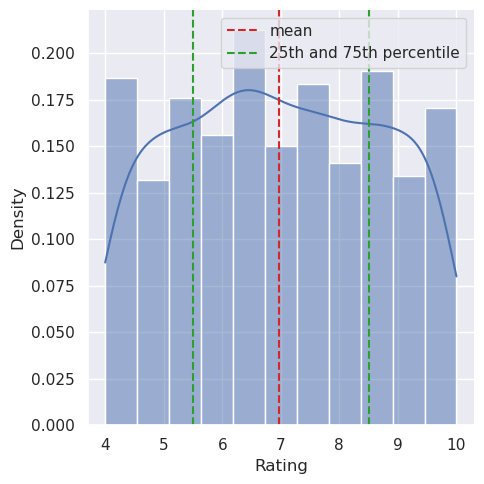

In [16]:
%%capture --no-display
sns.displot(
    df["Rating"],
    stat="density",
    kde=True,
)
plt.axvline(x=np.mean(df["Rating"]), color="tab:red", linestyle="--", label='mean')
plt.axvline(x=np.percentile(df["Rating"], 25), color="tab:green", linestyle="--", label='25th and 75th percentile')
plt.axvline(x=np.percentile(df["Rating"], 75), color="tab:green", linestyle="--")
plt.legend()
plt.show()

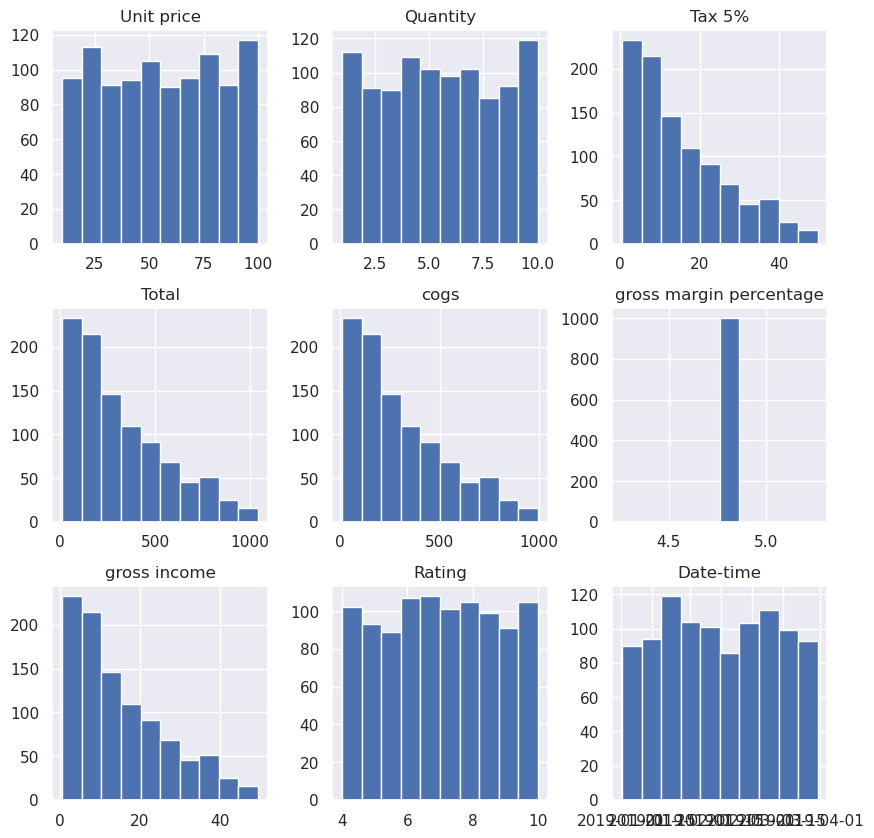

In [17]:
df.hist(figsize=(10, 10))
plt.show()

### Question 2:
 Do aggregate sales numbers differ by much between brances?

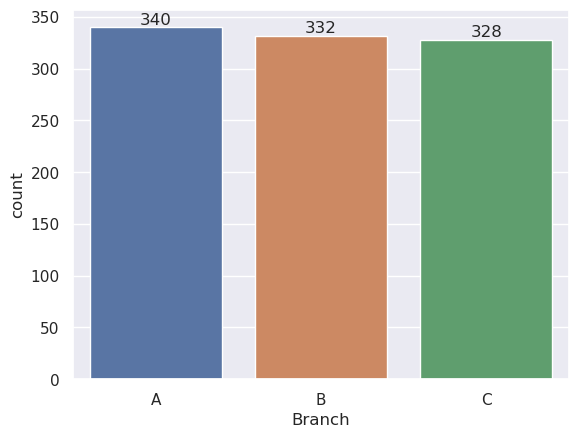

In [18]:
ax = sns.countplot(
    df,
    x='Branch',
    order=df['Branch'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

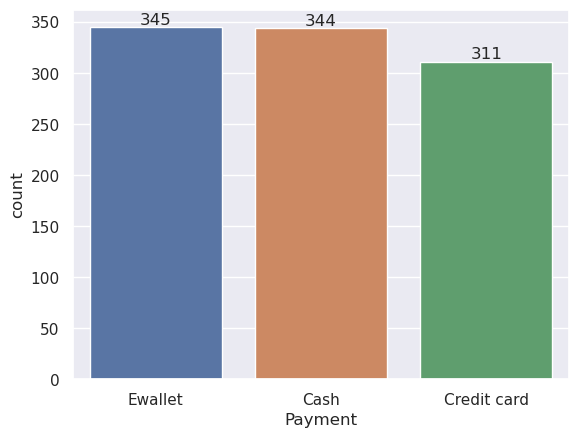

In [19]:
ax = sns.countplot(df,
                   x='Payment',
                   order=df['Payment'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Bivariate Analysis

### Question 3:
Is there a relationship between gross income and customer ratings?

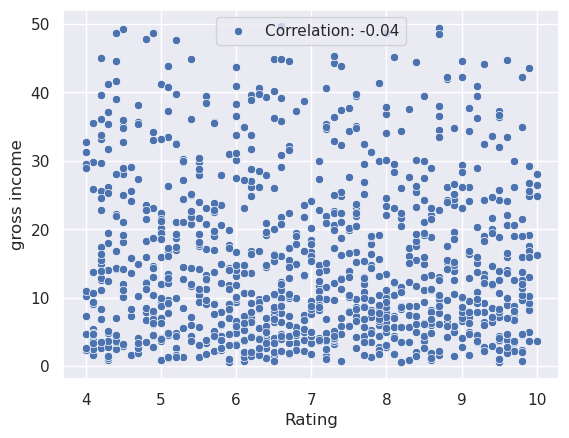

In [20]:
sns.scatterplot(
    data=df,
    x='Rating',
    y='gross income',
    label=f'Correlation: {np.corrcoef(df["Rating"], df["gross income"])[0][1]:.2f}'
)
plt.legend()
plt.show()

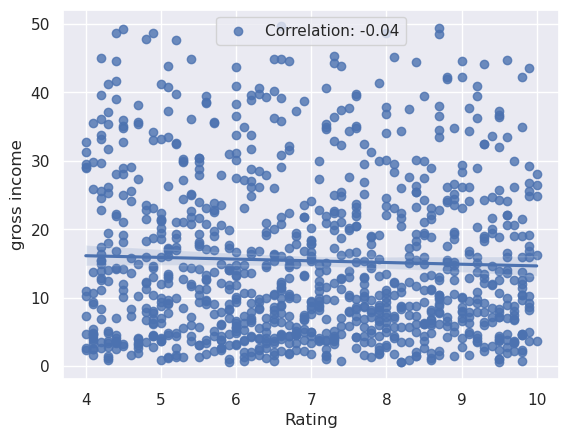

In [21]:
sns.regplot(
    data=df,
    x='Rating',
    y='gross income',
    label=f'Correlation: {np.corrcoef(df["Rating"], df["gross income"])[0][1]:.2f}'
)
plt.legend()
plt.show()

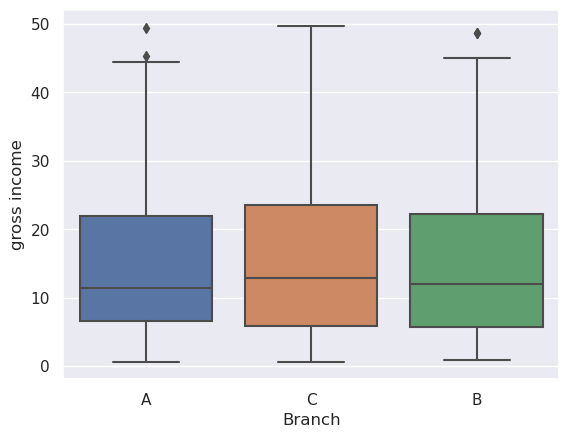

In [22]:
sns.boxplot(
    data=df,
    x='Branch',
    y='gross income'
)
plt.show()

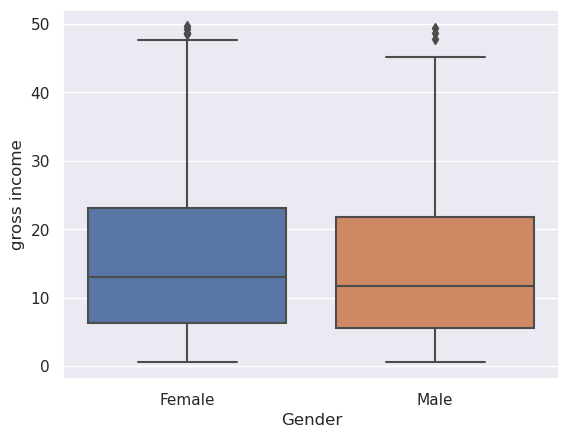

In [23]:
sns.boxplot(
    data=df,
    x='Gender',
    y='gross income'
)
plt.show()

### Question 4:
Is there a noticiable time trend in gross income?

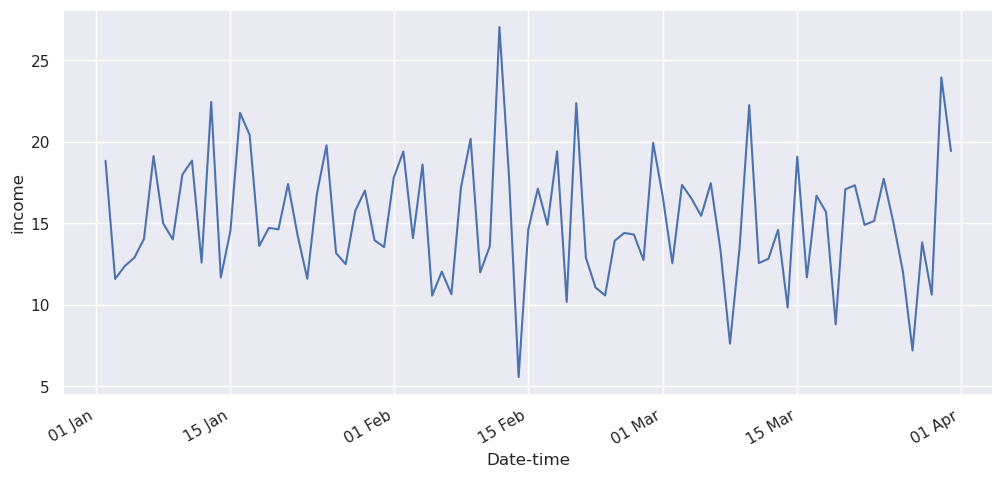

In [24]:
%%capture --no-display
group = df.groupby(
    [
        pd.Grouper(key='Date-time', freq='D', closed='right', label ='right')
    ]   
).agg(
    income=('gross income', 'mean'),
).reset_index()

fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(
    data=group,
    x='Date-time',
    y='income',
    ax=ax
)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'show_'

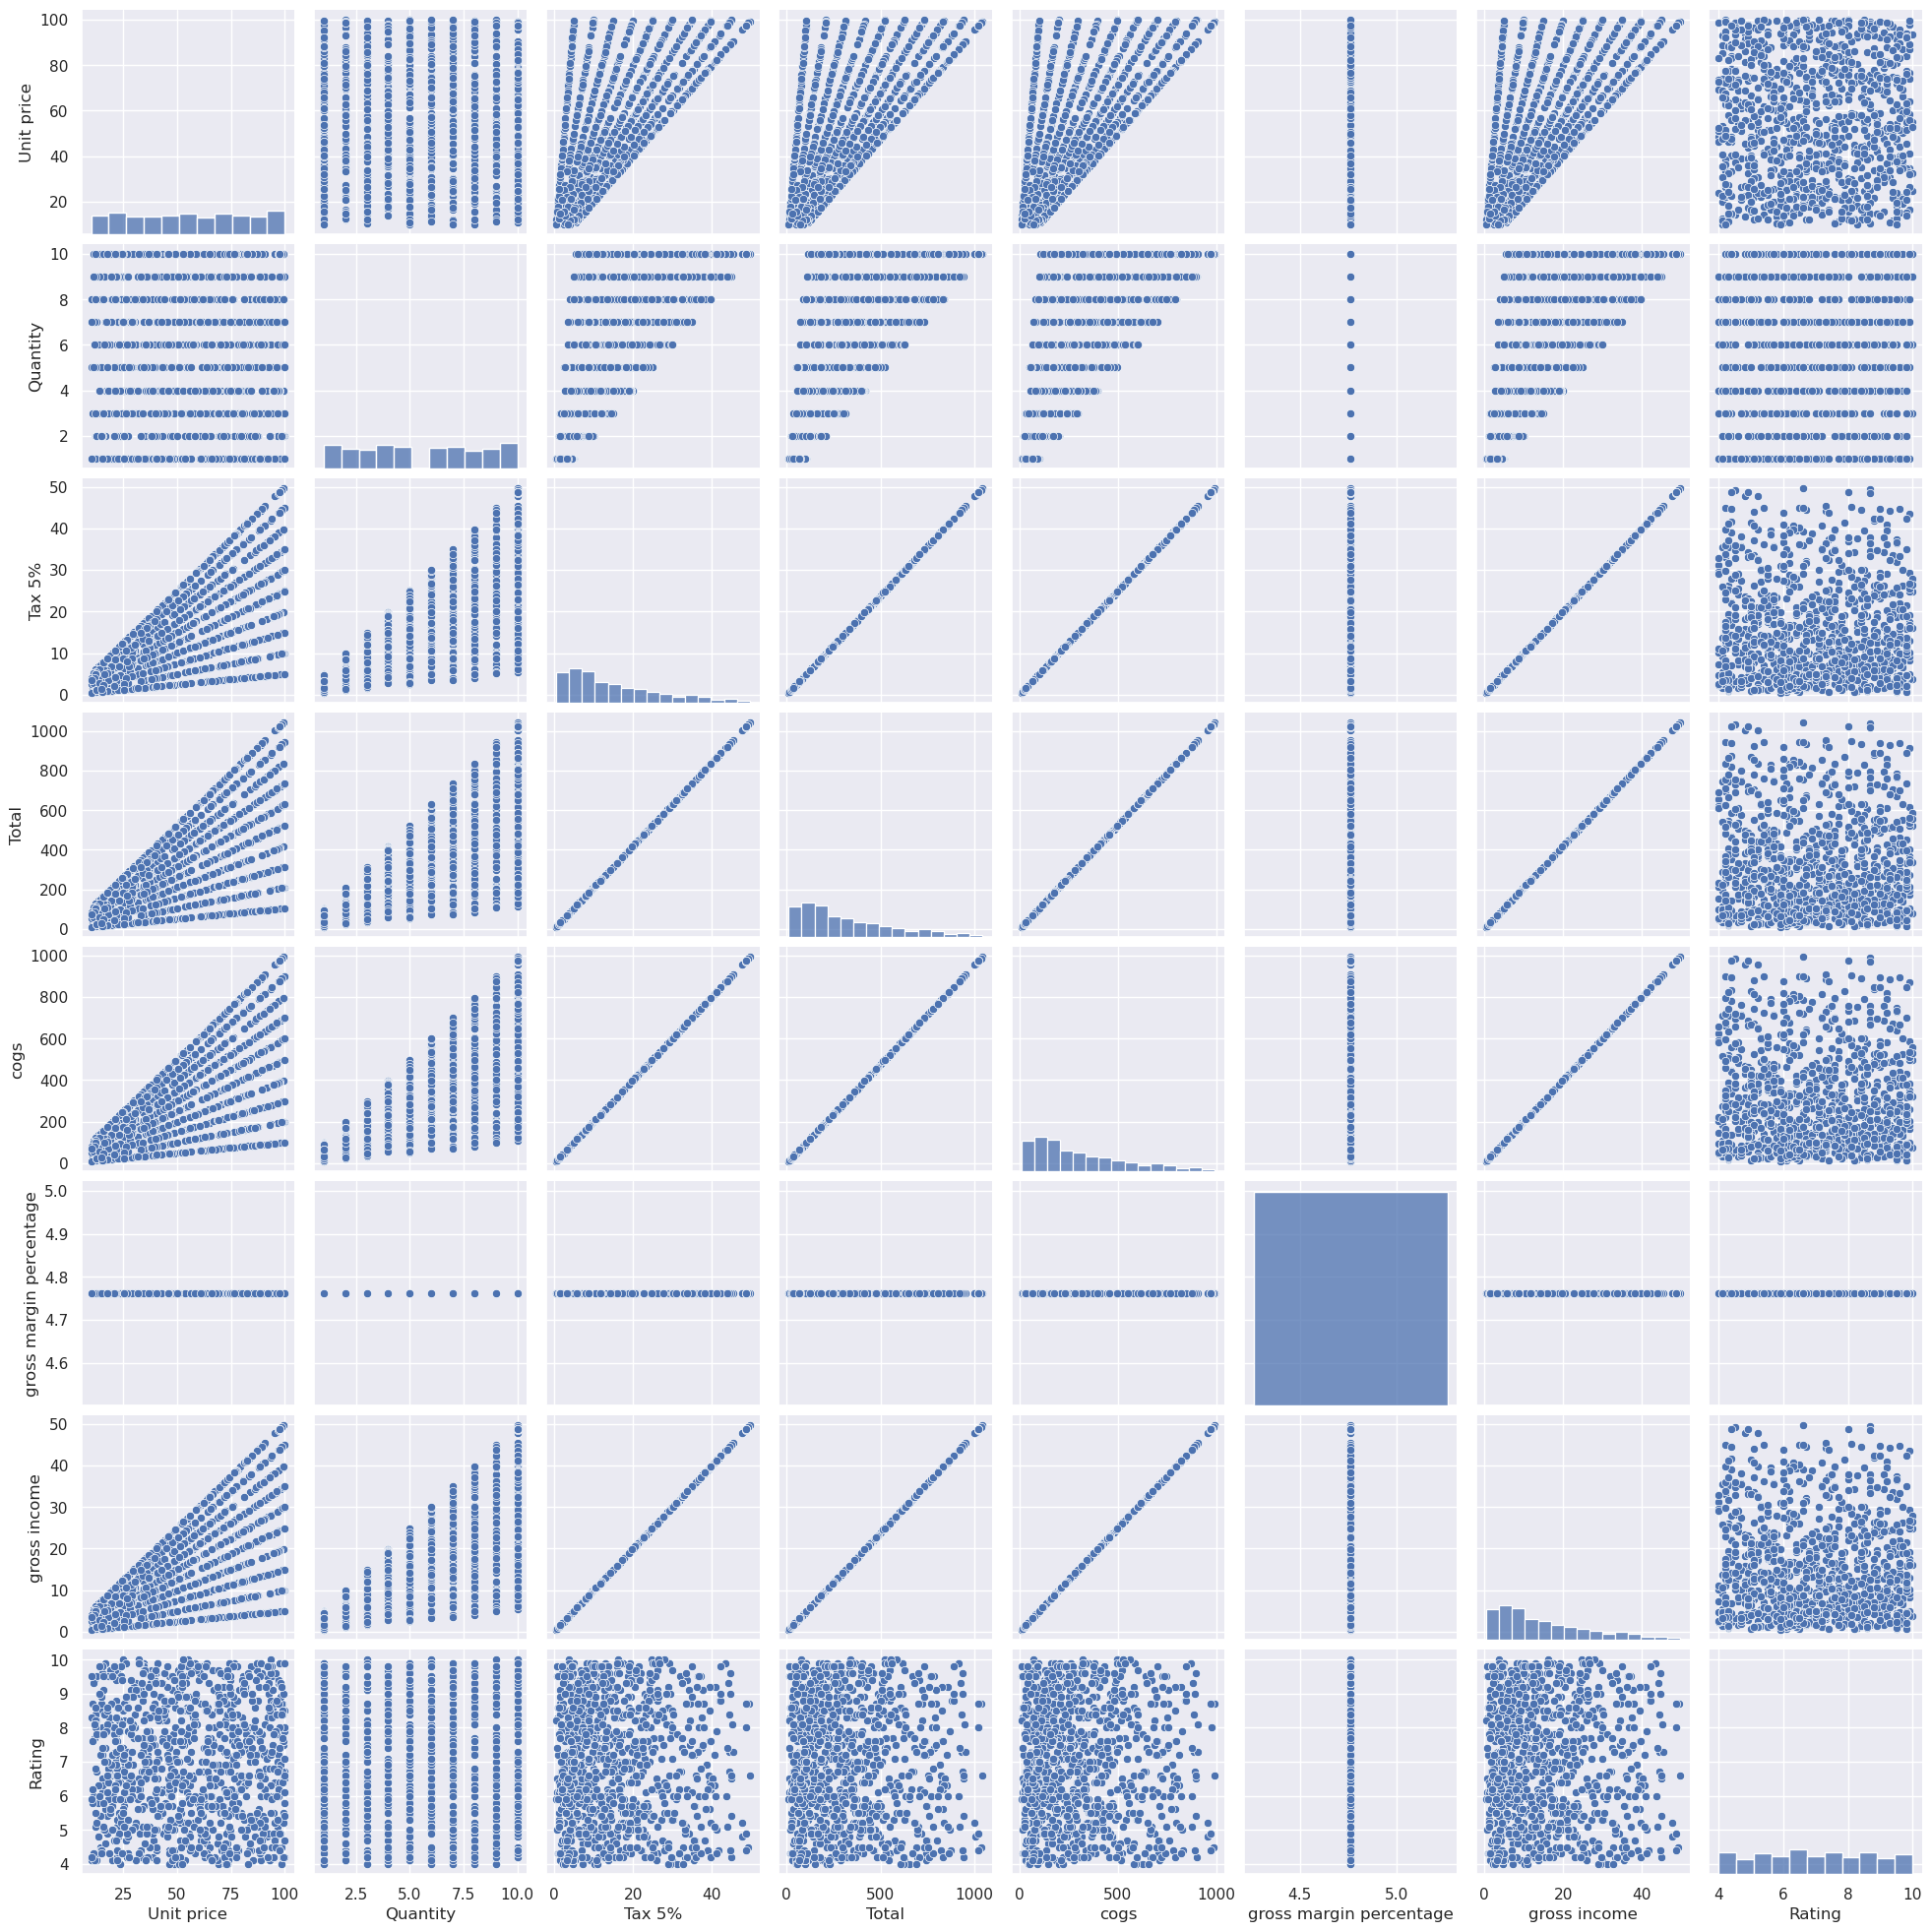

In [25]:
%%capture --no-display
sns.pairplot(df)
plt.show_

## Dealing with duplicate rows and missing values

In [26]:
df.duplicated().sum()

0

In [27]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Date-time                  0
dtype: int64

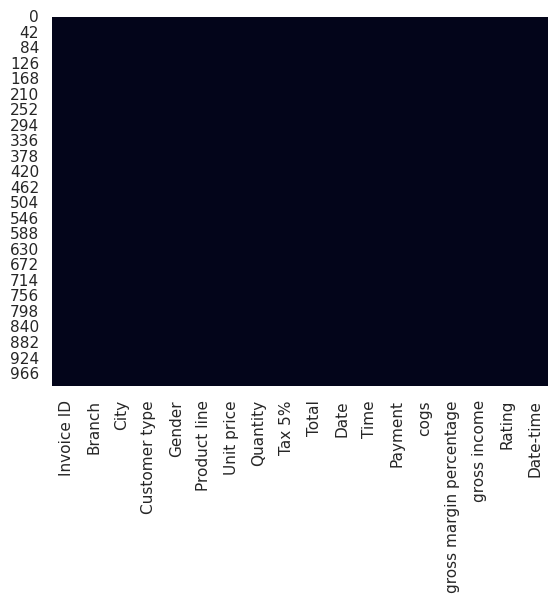

In [28]:
sns.heatmap(
    df.isnull(),
    cbar=False
)
plt.show()

## Pandas profiling

In [29]:
df.profile_report(correlations={"auto": {"calculate": False}}).to_file('../docs/index.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Analysis

In [31]:
np.round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

In [34]:
np.round(df.corr(numeric_only=True), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


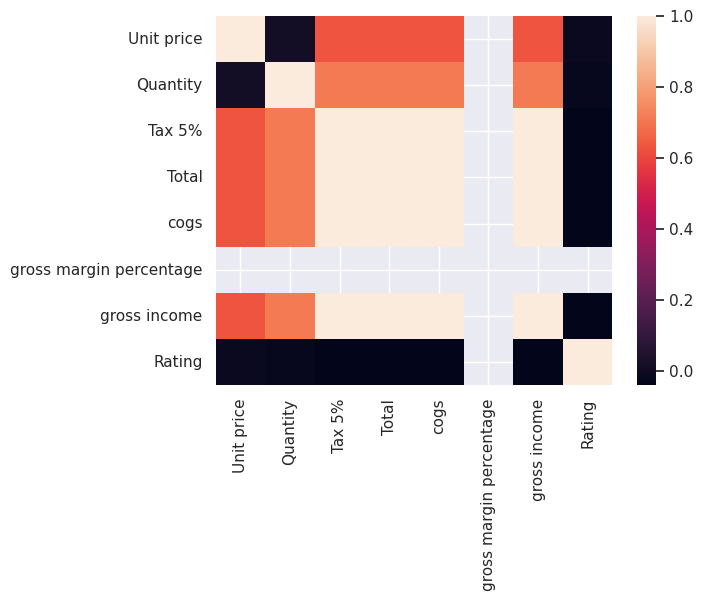

In [40]:
sns.heatmap(np.round(df.corr(numeric_only=True), 2))
plt.show()